# Topic model visualizations

In [138]:
%matplotlib inline
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt
import seaborn as sns
import re

- mike-jan aftermike -0.133* 
- mainroom filler-words -0.507**
- mainroom pyhyllisvancecruise 0.138*
- mainroom moneylottery -0.143*
- mainroom Andrew 0.226**
- mainroom accountantspam -0.146*
- higherups aftermike -0.156*
- higherups racediscussions -0.102
- higherups dwightfarm -0.111
- aftermike fillerwords -0.219**
- fillerwords sportsbasketball -0.133*

** corr sig at 0.01 (two-tailed)
* corr sig at 0.05 (two tailed)

In [139]:
# The following data was produced by jsLDA using the default corpus (political speeches),
# running 100 iterations, pressing "Downloads", and picking "Document topics".
# df = pd.read_csv('doctopics.csv', header=None, index_col=0)
df = pd.read_table('runs/tot_composition25100000.txt', header=None, index_col=1)

In [140]:
# Columns are topics, rows are documents, each value is a topic weight.
df

,0,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
1,,,,,,,,,,,,,,,,,,,,,
s1e1_0,0,0.146778,0.000579,0.069794,0.000686,0.134203,0.006193,0.023663,0.000824,0.001302,...,0.000852,0.058701,0.000401,0.000483,0.000615,0.006139,0.000456,0.000566,0.000516,0.000561
s1e1_30,1,0.001927,0.000650,0.039313,0.046421,0.000836,0.013482,0.000508,0.203094,0.021028,...,0.000958,0.007281,0.000450,0.000543,0.000691,0.000378,0.059207,0.000636,0.013623,0.000630
s1e1_60,2,0.129445,0.000705,0.056801,0.000836,0.000907,0.000476,0.043003,0.001005,0.001588,...,0.001039,0.191855,0.000488,0.000589,0.036126,0.000410,0.000556,0.000691,0.000629,0.007759
s1e1_90,3,0.021079,0.045412,0.019369,0.000756,0.167126,0.000431,0.000499,0.167214,0.001436,...,0.020129,0.000745,0.006838,0.032514,0.000678,0.000371,0.000503,0.000624,0.000569,0.000618
s1e1_120,4,0.017886,0.000777,0.226185,0.039880,0.086710,0.000525,0.000607,0.008898,0.001749,...,0.040104,0.000907,0.000538,0.000648,0.000825,0.000451,0.000613,0.000760,0.000693,0.000753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s5e28_54990,1834,0.012783,0.000984,0.108825,0.020902,0.001265,0.000665,0.000769,0.011269,0.002215,...,0.001450,0.168904,0.000681,0.000821,0.001045,0.020308,0.000776,0.000963,0.020613,0.000953
s5e28_55020,1835,0.017886,0.000777,0.015803,0.000921,0.000999,0.000525,0.000607,0.133569,0.017333,...,0.055688,0.328167,0.000538,0.000648,0.000825,0.000451,0.000613,0.008552,0.000693,0.000753
s5e28_55050,1836,0.001603,0.000541,0.086950,0.000641,0.000696,0.000365,0.000423,0.309985,0.001218,...,0.114718,0.000631,0.000374,0.000451,0.000575,0.076262,0.022126,0.000529,0.000482,0.000524


In [141]:
# The topics have numeric labels. We could assign more descriptive labels by hand,
# and add them as follows (be sure to pass the right number and in the right order):

# df.columns = ['war', 'finance', 'election', ...]
df.columns = ["index", "business", "meredith", "main-room", "mike-jan", "dwight-aspirations", "x", "x",
                "higher-ups", "after-mike", "race-discussions", "x", "Holly", "dwight-farm", "filler-words", 
              "phyllis-vance-cruise", "money-lottery", "sports-basketball", "drugs", "x", 
              "babies", "mikes-film", "Andrew", "accountants-pam", "women", "christmas"]

# In the rest of the code, use these labels instead of numbers whenever a column is specified;
# they will appear in the plots as labels.

df

,index,business,meredith,main-room,mike-jan,dwight-aspirations,x,x,higher-ups,after-mike,...,money-lottery,sports-basketball,drugs,x,babies,mikes-film,Andrew,accountants-pam,women,christmas
1,,,,,,,,,,,,,,,,,,,,,
s1e1_0,0,0.146778,0.000579,0.069794,0.000686,0.134203,0.006193,0.023663,0.000824,0.001302,...,0.000852,0.058701,0.000401,0.000483,0.000615,0.006139,0.000456,0.000566,0.000516,0.000561
s1e1_30,1,0.001927,0.000650,0.039313,0.046421,0.000836,0.013482,0.000508,0.203094,0.021028,...,0.000958,0.007281,0.000450,0.000543,0.000691,0.000378,0.059207,0.000636,0.013623,0.000630
s1e1_60,2,0.129445,0.000705,0.056801,0.000836,0.000907,0.000476,0.043003,0.001005,0.001588,...,0.001039,0.191855,0.000488,0.000589,0.036126,0.000410,0.000556,0.000691,0.000629,0.007759
s1e1_90,3,0.021079,0.045412,0.019369,0.000756,0.167126,0.000431,0.000499,0.167214,0.001436,...,0.020129,0.000745,0.006838,0.032514,0.000678,0.000371,0.000503,0.000624,0.000569,0.000618
s1e1_120,4,0.017886,0.000777,0.226185,0.039880,0.086710,0.000525,0.000607,0.008898,0.001749,...,0.040104,0.000907,0.000538,0.000648,0.000825,0.000451,0.000613,0.000760,0.000693,0.000753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s5e28_54990,1834,0.012783,0.000984,0.108825,0.020902,0.001265,0.000665,0.000769,0.011269,0.002215,...,0.001450,0.168904,0.000681,0.000821,0.001045,0.020308,0.000776,0.000963,0.020613,0.000953
s5e28_55020,1835,0.017886,0.000777,0.015803,0.000921,0.000999,0.000525,0.000607,0.133569,0.017333,...,0.055688,0.328167,0.000538,0.000648,0.000825,0.000451,0.000613,0.008552,0.000693,0.000753
s5e28_55050,1836,0.001603,0.000541,0.086950,0.000641,0.000696,0.000365,0.000423,0.309985,0.001218,...,0.114718,0.000631,0.000374,0.000451,0.000575,0.076262,0.022126,0.000529,0.000482,0.000524


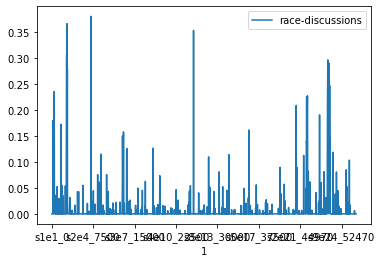

In [76]:
# plotting a single topic, with the document label on the x-axis.
ax = df.plot.line(y=10)
# ax.figure.savefig('/tmp/myplot.png')

In [77]:
#sns.histplot(data=df, y=);

In [78]:
# Looking at a single document
df.loc['s1e1_30', :]

index                   1.000000
business                0.001927
meredith                0.000650
main-room               0.039313
mike-jan                0.046421
dwight-aspirations      0.000836
x                       0.013482
x                       0.000508
higher-ups              0.203094
after-mike              0.021028
race-discussions        0.000340
x                       0.000476
Holly                   0.007133
dwight-farm             0.013683
filler-words            0.559724
phyllis-vance-cruise    0.006987
money-lottery           0.000958
sports-basketball       0.007281
drugs                   0.000450
x                       0.000543
babies                  0.000691
mikes-film              0.000378
Andrew                  0.059207
accountants-pam         0.000636
women                   0.013623
christmas               0.000630
Name: s1e1_30, dtype: float64

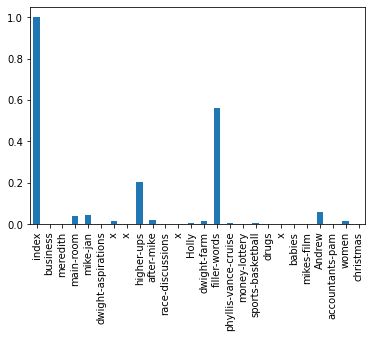

In [79]:
# ax = df.loc['s1e1_30', :].plot.bar()
ax = df.loc['s1e1_30', :].plot.bar()
# ax.figure.savefig('/tmp/myplot.png')

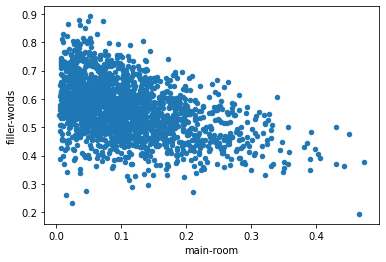

In [126]:
# We may be interested in the interaction between two topics.
# Plot topic 5 on the x axis, topic 9 on the y axis
ax = df.plot.scatter("main-room", "filler-words")
# ax.figure.savefig('/tmp/myplot.png')
# whether these topics are related, each dot is one doc, strength of the the presence of the topic.
# eg, acounting vs sales what topics are they associated with?
# temporal aspect, try visualising that. 

In [81]:
# We can look up the label of particular outliers by sorting the table.
# See the outlier for topic 5 on the bottom;
# pass by=[9] to see the outlier for topic 9.
df.sort_values(by=["business", "drugs"])

,index,business,meredith,main-room,mike-jan,dwight-aspirations,x,x,higher-ups,after-mike,...,money-lottery,sports-basketball,drugs,x,babies,mikes-film,Andrew,accountants-pam,women,christmas
1,,,,,,,,,,,,,,,,,,,,,
s7e17_38160,1272,0.000831,0.019980,0.168933,0.003147,0.000361,0.000190,0.000219,0.008842,0.000632,...,0.006042,0.011584,0.000194,0.003048,0.000298,0.419482,0.000221,0.000275,0.000250,0.000272
s5e5_11130,371,0.001157,0.000390,0.074521,0.008296,0.000502,0.000264,0.000305,0.004472,0.008712,...,0.396129,0.000456,0.000270,0.000326,0.019997,0.004143,0.000308,0.012131,0.000348,0.000378
s8e5_11640,388,0.001157,0.074802,0.023609,0.000463,0.000502,0.000264,0.004222,0.000556,0.000879,...,0.071070,0.004372,0.000270,0.000326,0.168819,0.000227,0.015973,0.000382,0.106090,0.000378
s7e22_48390,1614,0.001176,0.000397,0.386046,0.000470,0.032340,0.000268,0.000310,0.000565,0.024765,...,0.000584,0.000463,0.000275,0.000331,0.000421,0.000231,0.000313,0.000388,0.004332,0.075980
s7e17_38250,1275,0.001190,0.000401,0.108836,0.000476,0.004543,0.000271,0.000314,0.004599,0.000904,...,0.000592,0.000469,0.000278,0.000335,0.028614,0.314321,0.004343,0.028580,0.000358,0.004416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s5e22_47700,1591,0.334932,0.000872,0.175166,0.036018,0.001121,0.000589,0.000682,0.001242,0.001963,...,0.010031,0.001018,0.000604,0.000728,0.000927,0.000507,0.000688,0.000854,0.000778,0.000845
s5e25_53010,1768,0.343413,0.000850,0.085464,0.001007,0.001093,0.000574,0.000664,0.094956,0.001913,...,0.001252,0.000992,0.000588,0.000709,0.000903,0.000494,0.000670,0.000832,0.000758,0.000823
s5e16_35190,1173,0.345610,0.001035,0.104093,0.001227,0.001331,0.000699,0.000809,0.001474,0.002330,...,0.063806,0.011588,0.000717,0.000864,0.001100,0.000601,0.000816,0.001013,0.000923,0.001003


In [82]:
# there are also data points which score high on *both* topics
# we can find them by adding the topic values together and sorting on that.
(df["meredith"] + df["drugs"]).sort_values()

1
s3e23_49380    0.000646
s7e17_38310    0.000656
s5e5_11130     0.000661
s2e16_34350    0.000663
s7e22_48390    0.000671
                 ...   
s9e10_23790    0.352233
s9e4_9630      0.352462
s2e20_43110    0.362031
s7e7_16200     0.383828
s2e19_41130    0.534743
Length: 1839, dtype: float64

<AxesSubplot:xlabel='1', ylabel='business'>

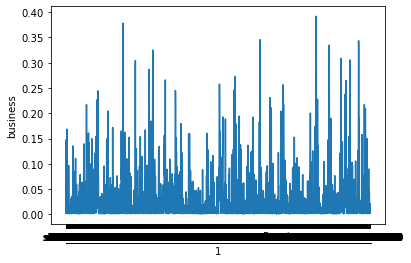

In [83]:
sns.lineplot(data=df["business"])

In [98]:
df.index = pd.MultiIndex.from_tuples(k.split('_') for k, v in df.iterrows())

In [100]:
df.index = df.index.get_level_values(0)

<AxesSubplot:ylabel='business'>

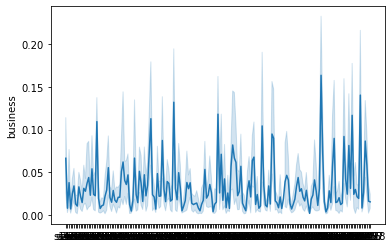

In [101]:
sns.lineplot(data=df["business"])

In [142]:
# Notice that are labels have structure: they consist of both a year and a speech number
# If we want to select speeches by year and compute aggregate statistics for them,
# we have to split up the label (here we split on the dash '-' in the labels):
df.index = pd.MultiIndex.from_tuples(re.split('e|_', k) for k, v in df.iterrows())
# df.index = pd.MultiIndex.from_tuples(k.split('e') for k, v in df.iterrows())

In [143]:
df

index  business  meredith  main-room  mike-jan  \
s1 1  0          0  0.146778  0.000579   0.069794  0.000686   
      30         1  0.001927  0.000650   0.039313  0.046421   
      60         2  0.129445  0.000705   0.056801  0.000836   
      90         3  0.021079  0.045412   0.019369  0.000756   
      120        4  0.017886  0.000777   0.226185  0.039880   
...            ...       ...       ...        ...       ...   
s5 28 54990   1834  0.012783  0.000984   0.108825  0.020902   
      55020   1835  0.017886  0.000777   0.015803  0.000921   
      55050   1836  0.001603  0.000541   0.086950  0.000641   
      55080   1837  0.021188  0.000920   0.101794  0.001091   
      55110   1838  0.014340  0.001104   0.133146  0.012378   

             dwight-aspirations         x         x  higher-ups  after-mike  \
s1 1  0                0.134203  0.006193  0.023663    0.000824    0.001302   
      30               0.000836  0.013482  0.000508    0.203094    0.021028   
      60               0.000907  0.000476  0.043003    0.001005    0.001588   
      90               0.167126  0.000431  0.000499    0.167214    0.001436   
      120              0.086710  0.000525  0.000607    0.008898    0.001749   
...                         ...       ...       ...         ...         ...   
s5 28 54990            0.001265  0.000665  0.000769    0.011269    0.002215   
      55020            0.000999  0.000525  0.000607    0.133569    0.017333   
      55050            0.000696  0.000365  0.000423    0.309985    0.001218   
      55080            0.010414  0.000622  0.000720    0.001311    0.002072   
      55110            0.001419  0.000745  0.023002    0.112267    0.002485   

             ...  money-lottery  sports-basketball     drugs         x  \
s1 1  0      ...       0.000852           0.058701  0.000401  0.000483   
      30     ...       0.000958           0.007281  0.000450  0.000543   
      60     ...       0.001039           0.191855  0.000488  0.000589   
      90     ...       0.020129           0.000745  0.006838  0.032514   
      120    ...       0.040104           0.000907  0.000538  0.000648   
...          ...            ...                ...       ...       ...   
s5 28 54990  ...       0.001450           0.168904  0.000681  0.000821   
      55020  ...       0.055688           0.328167  0.000538  0.000648   
      55050  ...       0.114718           0.000631  0.000374  0.000451   
      55080  ...       0.001356           0.259524  0.000637  0.000768   
      55110  ...       0.001626           0.156262  0.000764  0.011990   

               babies  mikes-film    Andrew  accountants-pam     women  \
s1 1  0      0.000615    0.006139  0.000456         0.000566  0.000516   
      30     0.000691    0.000378  0.059207         0.000636  0.013623   
      60     0.036126    0.000410  0.000556         0.000691  0.000629   
      90     0.000678    0.000371  0.000503         0.000624  0.000569   
      120    0.000825    0.000451  0.000613         0.000760  0.000693   
...               ...         ...       ...              ...       ...   
s5 28 54990  0.001045    0.020308  0.000776         0.000963  0.020613   
      55020  0.000825    0.000451  0.000613         0.008552  0.000693   
      55050  0.000575    0.076262  0.022126         0.000529  0.000482   
      55080  0.019439    0.000535  0.000726         0.000901  0.000821   
      55110  0.001173    0.000641  0.011940         0.001080  0.000984   

             christmas  
s1 1  0       0.000561  
      30      0.000630  
      60      0.007759  
      90      0.000618  
      120     0.000753  
...                ...  
s5 28 54990   0.000953  
      55020   0.000753  
      55050   0.000524  
      55080   0.010122  
      55110   0.001070  

[1839 rows x 26 columns]

In [144]:
df.reset_index(level=0, inplace=True) 
df

level_0  index  business  meredith  main-room  mike-jan  \
1  0          s1      0  0.146778  0.000579   0.069794  0.000686   
   30         s1      1  0.001927  0.000650   0.039313  0.046421   
   60         s1      2  0.129445  0.000705   0.056801  0.000836   
   90         s1      3  0.021079  0.045412   0.019369  0.000756   
   120        s1      4  0.017886  0.000777   0.226185  0.039880   
...          ...    ...       ...       ...        ...       ...   
28 54990      s5   1834  0.012783  0.000984   0.108825  0.020902   
   55020      s5   1835  0.017886  0.000777   0.015803  0.000921   
   55050      s5   1836  0.001603  0.000541   0.086950  0.000641   
   55080      s5   1837  0.021188  0.000920   0.101794  0.001091   
   55110      s5   1838  0.014340  0.001104   0.133146  0.012378   

          dwight-aspirations         x         x  higher-ups  ...  \
1  0                0.134203  0.006193  0.023663    0.000824  ...   
   30               0.000836  0.013482  0.000508    0.203094  ...   
   60               0.000907  0.000476  0.043003    0.001005  ...   
   90               0.167126  0.000431  0.000499    0.167214  ...   
   120              0.086710  0.000525  0.000607    0.008898  ...   
...                      ...       ...       ...         ...  ...   
28 54990            0.001265  0.000665  0.000769    0.011269  ...   
   55020            0.000999  0.000525  0.000607    0.133569  ...   
   55050            0.000696  0.000365  0.000423    0.309985  ...   
   55080            0.010414  0.000622  0.000720    0.001311  ...   
   55110            0.001419  0.000745  0.023002    0.112267  ...   

          money-lottery  sports-basketball     drugs         x    babies  \
1  0           0.000852           0.058701  0.000401  0.000483  0.000615   
   30          0.000958           0.007281  0.000450  0.000543  0.000691   
   60          0.001039           0.191855  0.000488  0.000589  0.036126   
   90          0.020129           0.000745  0.006838  0.032514  0.000678   
   120         0.040104           0.000907  0.000538  0.000648  0.000825   
...                 ...                ...       ...       ...       ...   
28 54990       0.001450           0.168904  0.000681  0.000821  0.001045   
   55020       0.055688           0.328167  0.000538  0.000648  0.000825   
   55050       0.114718           0.000631  0.000374  0.000451  0.000575   
   55080       0.001356           0.259524  0.000637  0.000768  0.019439   
   55110       0.001626           0.156262  0.000764  0.011990  0.001173   

          mikes-film    Andrew  accountants-pam     women  christmas  
1  0        0.006139  0.000456         0.000566  0.000516   0.000561  
   30       0.000378  0.059207         0.000636  0.013623   0.000630  
   60       0.000410  0.000556         0.000691  0.000629   0.007759  
   90       0.000371  0.000503         0.000624  0.000569   0.000618  
   120      0.000451  0.000613         0.000760  0.000693   0.000753  
...              ...       ...              ...       ...        ...  
28 54990    0.020308  0.000776         0.000963  0.020613   0.000953  
   55020    0.000451  0.000613         0.008552  0.000693   0.000753  
   55050    0.076262  0.022126         0.000529  0.000482   0.000524  
   55080    0.000535  0.000726         0.000901  0.000821   0.010122  
   55110    0.000641  0.011940         0.001080  0.000984   0.001070  

[1839 rows x 27 columns]

In [146]:
df.reset_index(level=1, inplace=True) 
df

,level_1,level_0,index,business,meredith,main-room,mike-jan,dwight-aspirations,x,x,...,money-lottery,sports-basketball,drugs,x,babies,mikes-film,Andrew,accountants-pam,women,christmas
1,0,s1,0,0.146778,0.000579,0.069794,0.000686,0.134203,0.006193,0.023663,...,0.000852,0.058701,0.000401,0.000483,0.000615,0.006139,0.000456,0.000566,0.000516,0.000561
1,30,s1,1,0.001927,0.000650,0.039313,0.046421,0.000836,0.013482,0.000508,...,0.000958,0.007281,0.000450,0.000543,0.000691,0.000378,0.059207,0.000636,0.013623,0.000630
1,60,s1,2,0.129445,0.000705,0.056801,0.000836,0.000907,0.000476,0.043003,...,0.001039,0.191855,0.000488,0.000589,0.036126,0.000410,0.000556,0.000691,0.000629,0.007759
1,90,s1,3,0.021079,0.045412,0.019369,0.000756,0.167126,0.000431,0.000499,...,0.020129,0.000745,0.006838,0.032514,0.000678,0.000371,0.000503,0.000624,0.000569,0.000618
1,120,s1,4,0.017886,0.000777,0.226185,0.039880,0.086710,0.000525,0.000607,...,0.040104,0.000907,0.000538,0.000648,0.000825,0.000451,0.000613,0.000760,0.000693,0.000753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,54990,s5,1834,0.012783,0.000984,0.108825,0.020902,0.001265,0.000665,0.000769,...,0.001450,0.168904,0.000681,0.000821,0.001045,0.020308,0.000776,0.000963,0.020613,0.000953
28,55020,s5,1835,0.017886,0.000777,0.015803,0.000921,0.000999,0.000525,0.000607,...,0.055688,0.328167,0.000538,0.000648,0.000825,0.000451,0.000613,0.008552,0.000693,0.000753
28,55050,s5,1836,0.001603,0.000541,0.086950,0.000641,0.000696,0.000365,0.000423,...,0.114718,0.000631,0.000374,0.000451,0.000575,0.076262,0.022126,0.000529,0.000482,0.000524
28,55080,s5,1837,0.021188,0.000920,0.101794,0.001091,0.010414,0.000622,0.000720,...,0.001356,0.259524,0.000637,0.000768,0.019439,0.000535,0.000726,0.000901,0.000821,0.010122


In [149]:
df.columns = ["episode-breaks", "season","index", "business", "meredith", "main-room", "mike-jan", "dwight-aspirations", "x", "x",
                "higher-ups", "after-mike", "race-discussions", "x", "Holly", "dwight-farm", "filler-words", 
              "phyllis-vance-cruise", "money-lottery", "sports-basketball", "drugs", "x", 
              "babies", "mikes-film", "Andrew", "accountants-pam", "women", "christmas"]


In [150]:
df.reset_index(level=0, inplace=True) 
df

,level_0,episode-breaks,season,index,business,meredith,main-room,mike-jan,dwight-aspirations,x,...,money-lottery,sports-basketball,drugs,x,babies,mikes-film,Andrew,accountants-pam,women,christmas
0,1,0,s1,0,0.146778,0.000579,0.069794,0.000686,0.134203,0.006193,...,0.000852,0.058701,0.000401,0.000483,0.000615,0.006139,0.000456,0.000566,0.000516,0.000561
1,1,30,s1,1,0.001927,0.000650,0.039313,0.046421,0.000836,0.013482,...,0.000958,0.007281,0.000450,0.000543,0.000691,0.000378,0.059207,0.000636,0.013623,0.000630
2,1,60,s1,2,0.129445,0.000705,0.056801,0.000836,0.000907,0.000476,...,0.001039,0.191855,0.000488,0.000589,0.036126,0.000410,0.000556,0.000691,0.000629,0.007759
3,1,90,s1,3,0.021079,0.045412,0.019369,0.000756,0.167126,0.000431,...,0.020129,0.000745,0.006838,0.032514,0.000678,0.000371,0.000503,0.000624,0.000569,0.000618
4,1,120,s1,4,0.017886,0.000777,0.226185,0.039880,0.086710,0.000525,...,0.040104,0.000907,0.000538,0.000648,0.000825,0.000451,0.000613,0.000760,0.000693,0.000753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,28,54990,s5,1834,0.012783,0.000984,0.108825,0.020902,0.001265,0.000665,...,0.001450,0.168904,0.000681,0.000821,0.001045,0.020308,0.000776,0.000963,0.020613,0.000953
1835,28,55020,s5,1835,0.017886,0.000777,0.015803,0.000921,0.000999,0.000525,...,0.055688,0.328167,0.000538,0.000648,0.000825,0.000451,0.000613,0.008552,0.000693,0.000753
1836,28,55050,s5,1836,0.001603,0.000541,0.086950,0.000641,0.000696,0.000365,...,0.114718,0.000631,0.000374,0.000451,0.000575,0.076262,0.022126,0.000529,0.000482,0.000524
1837,28,55080,s5,1837,0.021188,0.000920,0.101794,0.001091,0.010414,0.000622,...,0.001356,0.259524,0.000637,0.000768,0.019439,0.000535,0.000726,0.000901,0.000821,0.010122


In [151]:
df.columns = ["episode","episode-breaks", "season","index", "business", "meredith", "main-room", "mike-jan", "dwight-aspirations", "x", "x",
                "higher-ups", "after-mike", "race-discussions", "x", "Holly", "dwight-farm", "filler-words", 
              "phyllis-vance-cruise", "money-lottery", "sports-basketball", "drugs", "x", 
              "babies", "mikes-film", "Andrew", "accountants-pam", "women", "christmas"]


In [104]:
# df.index = df.index.get_level_values(0)

In [105]:
df

,index,business,meredith,main-room,mike-jan,dwight-aspirations,x,x,higher-ups,after-mike,...,money-lottery,sports-basketball,drugs,x,babies,mikes-film,Andrew,accountants-pam,women,christmas
s1,0,0.146778,0.000579,0.069794,0.000686,0.134203,0.006193,0.023663,0.000824,0.001302,...,0.000852,0.058701,0.000401,0.000483,0.000615,0.006139,0.000456,0.000566,0.000516,0.000561
s1,1,0.001927,0.000650,0.039313,0.046421,0.000836,0.013482,0.000508,0.203094,0.021028,...,0.000958,0.007281,0.000450,0.000543,0.000691,0.000378,0.059207,0.000636,0.013623,0.000630
s1,2,0.129445,0.000705,0.056801,0.000836,0.000907,0.000476,0.043003,0.001005,0.001588,...,0.001039,0.191855,0.000488,0.000589,0.036126,0.000410,0.000556,0.000691,0.000629,0.007759
s1,3,0.021079,0.045412,0.019369,0.000756,0.167126,0.000431,0.000499,0.167214,0.001436,...,0.020129,0.000745,0.006838,0.032514,0.000678,0.000371,0.000503,0.000624,0.000569,0.000618
s1,4,0.017886,0.000777,0.226185,0.039880,0.086710,0.000525,0.000607,0.008898,0.001749,...,0.040104,0.000907,0.000538,0.000648,0.000825,0.000451,0.000613,0.000760,0.000693,0.000753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s5,1834,0.012783,0.000984,0.108825,0.020902,0.001265,0.000665,0.000769,0.011269,0.002215,...,0.001450,0.168904,0.000681,0.000821,0.001045,0.020308,0.000776,0.000963,0.020613,0.000953
s5,1835,0.017886,0.000777,0.015803,0.000921,0.000999,0.000525,0.000607,0.133569,0.017333,...,0.055688,0.328167,0.000538,0.000648,0.000825,0.000451,0.000613,0.008552,0.000693,0.000753
s5,1836,0.001603,0.000541,0.086950,0.000641,0.000696,0.000365,0.000423,0.309985,0.001218,...,0.114718,0.000631,0.000374,0.000451,0.000575,0.076262,0.022126,0.000529,0.000482,0.000524
s5,1837,0.021188,0.000920,0.101794,0.001091,0.010414,0.000622,0.000720,0.001311,0.002072,...,0.001356,0.259524,0.000637,0.000768,0.019439,0.000535,0.000726,0.000901,0.000821,0.010122


In [136]:
#df.loc(df.index != "Fanni")

TypeError: unhashable type: 'numpy.ndarray'

In [137]:
df.reset_index(level=0, inplace=True) 
df

,level_0,index,business,meredith,main-room,mike-jan,dwight-aspirations,x,x,higher-ups,...,money-lottery,sports-basketball,drugs,x,babies,mikes-film,Andrew,accountants-pam,women,christmas
0,s1,0,0.146778,0.000579,0.069794,0.000686,0.134203,0.006193,0.023663,0.000824,...,0.000852,0.058701,0.000401,0.000483,0.000615,0.006139,0.000456,0.000566,0.000516,0.000561
1,s1,1,0.001927,0.000650,0.039313,0.046421,0.000836,0.013482,0.000508,0.203094,...,0.000958,0.007281,0.000450,0.000543,0.000691,0.000378,0.059207,0.000636,0.013623,0.000630
2,s1,2,0.129445,0.000705,0.056801,0.000836,0.000907,0.000476,0.043003,0.001005,...,0.001039,0.191855,0.000488,0.000589,0.036126,0.000410,0.000556,0.000691,0.000629,0.007759
3,s1,3,0.021079,0.045412,0.019369,0.000756,0.167126,0.000431,0.000499,0.167214,...,0.020129,0.000745,0.006838,0.032514,0.000678,0.000371,0.000503,0.000624,0.000569,0.000618
4,s1,4,0.017886,0.000777,0.226185,0.039880,0.086710,0.000525,0.000607,0.008898,...,0.040104,0.000907,0.000538,0.000648,0.000825,0.000451,0.000613,0.000760,0.000693,0.000753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,s5,1834,0.012783,0.000984,0.108825,0.020902,0.001265,0.000665,0.000769,0.011269,...,0.001450,0.168904,0.000681,0.000821,0.001045,0.020308,0.000776,0.000963,0.020613,0.000953
1835,s5,1835,0.017886,0.000777,0.015803,0.000921,0.000999,0.000525,0.000607,0.133569,...,0.055688,0.328167,0.000538,0.000648,0.000825,0.000451,0.000613,0.008552,0.000693,0.000753
1836,s5,1836,0.001603,0.000541,0.086950,0.000641,0.000696,0.000365,0.000423,0.309985,...,0.114718,0.000631,0.000374,0.000451,0.000575,0.076262,0.022126,0.000529,0.000482,0.000524
1837,s5,1837,0.021188,0.000920,0.101794,0.001091,0.010414,0.000622,0.000720,0.001311,...,0.001356,0.259524,0.000637,0.000768,0.019439,0.000535,0.000726,0.000901,0.000821,0.010122


<AxesSubplot:ylabel='business'>

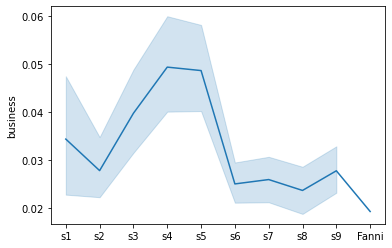

In [106]:
sns.lineplot(data=df["business"])

<AxesSubplot:ylabel='money-lottery'>

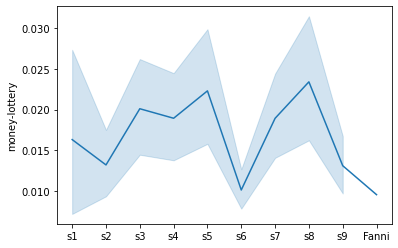

In [49]:
sns.lineplot(data=df["money-lottery"])

<AxesSubplot:ylabel='main-room'>

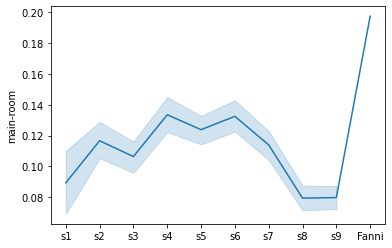

In [108]:
sns.lineplot(data=df["main-room"])

<AxesSubplot:ylabel='filler-words'>

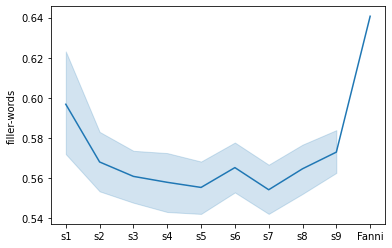

In [109]:
sns.lineplot(data=df["filler-words"])

In [111]:
# Average topic weights by year:
df.mean(level=0)

,index,business,meredith,main-room,mike-jan,dwight-aspirations,x,x,higher-ups,after-mike,...,money-lottery,sports-basketball,drugs,x,babies,mikes-film,Andrew,accountants-pam,women,christmas
s1,223.040000,0.034385,0.036056,0.089313,0.011725,0.035124,0.021868,0.004127,0.015539,0.005955,...,0.016320,0.045711,0.011844,0.007450,0.004039,0.004625,0.002895,0.004914,0.002900,0.004038
s2,801.901554,0.027802,0.012570,0.116630,0.041321,0.013893,0.014084,0.011736,0.012414,0.005899,...,0.013218,0.018663,0.021154,0.019508,0.005495,0.008945,0.005699,0.005012,0.009723,0.019133
s3,949.738318,0.039781,0.009192,0.106384,0.030011,0.023517,0.007755,0.004050,0.025695,0.010065,...,0.020096,0.022983,0.005586,0.010473,0.009253,0.005183,0.009809,0.008017,0.022488,0.021601
s4,703.432099,0.049416,0.019671,0.133485,0.029899,0.008832,0.006062,0.024455,0.013659,0.009107,...,0.018931,0.017651,0.002951,0.003853,0.004205,0.006133,0.007387,0.006505,0.008785,0.009875
s5,1049.537255,0.048695,0.013578,0.123828,0.007952,0.010702,0.012231,0.012548,0.037200,0.011653,...,0.022282,0.015078,0.005849,0.011876,0.022325,0.003981,0.008645,0.011093,0.008801,0.012522
s6,975.883268,0.025023,0.011756,0.132470,0.007944,0.013334,0.006675,0.006276,0.030002,0.029117,...,0.010148,0.012971,0.005974,0.007870,0.024691,0.015288,0.012579,0.011343,0.008662,0.013768
s7,978.356557,0.025934,0.012908,0.113916,0.005857,0.018599,0.013033,0.015059,0.007518,0.033205,...,0.018922,0.008741,0.011858,0.006590,0.010670,0.017830,0.006505,0.007457,0.011716,0.016670
s8,957.990991,0.023661,0.009216,0.079390,0.006253,0.012251,0.008722,0.009713,0.008634,0.063235,...,0.023386,0.012637,0.016298,0.018457,0.027005,0.005121,0.027940,0.019060,0.010750,0.011489
s9,978.448133,0.027766,0.011533,0.079754,0.006756,0.024253,0.009280,0.012374,0.010796,0.037593,...,0.013123,0.009803,0.012542,0.008323,0.010019,0.007575,0.010277,0.035737,0.012228,0.013106
Fanni,1289.000000,0.019262,0.006500,0.197427,0.007705,0.008360,0.004391,0.005083,0.009258,0.014634,...,0.009578,0.007589,0.004501,0.005424,0.006907,0.003777,0.005127,0.006363,0.005797,0.006300


In [112]:
# Do something a bit more advanced:
# Apply PCA to the mean topic weights for each year.
pca = decomposition.PCA(n_components=2)
meanweights = df.mean(level=0)
reduced = pca.fit_transform(meanweights)
result = pd.DataFrame(reduced, index=meanweights.index, columns=['PC1', 'PC2'])

In [113]:
result

,PC1,PC2
s1,667.692820,0.028781
s2,88.831264,0.006779
s3,-59.005499,-0.012858
s4,187.300718,0.017064
s5,-158.804437,-0.009004
s6,-85.150452,0.000877
s7,-87.623740,-0.020571
s8,-67.258173,-0.053852
s9,-87.715314,-0.043517
Fanni,-398.267187,0.086301


AttributeError: 'AxesSubplot' object has no attribute 'legend_elements'

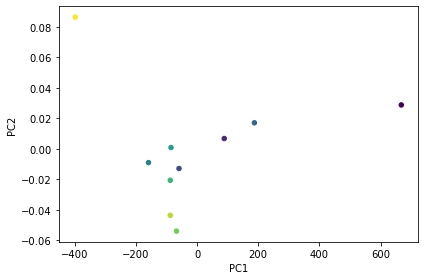

In [125]:
# Plot the results in a scatter plot
# We add a colormap so that the change over time is visualized.
fig, ax = plt.subplots()
x = result.plot.scatter('PC1', 'PC2', c=range(len(result)), colormap='viridis', ax=ax )
fig.tight_layout()
# fig.savefig('/tmp/myplot.png')


# datapoints that are closer to each other are similar in topics. 
# color based on range of datapoints, light to dark. 
# try colouring each season as a specific colour
# give it a list of colours so you have an index. 